In [3]:
# Imports
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import numpy as np


In [6]:
# File Upload
from google.colab import files
uploaded = files.upload()

height_data=pd.read_csv('weight-height.csv')
height_data.head()

height_data = np.array(height_data['Height'].values)
print(height_data)
print(np.mean(height_data))
print(np.var(height_data))

[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
66.36755975482124
14.801992292876763


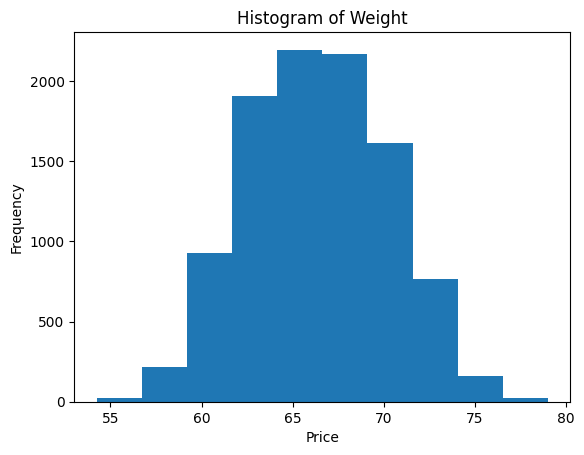

In [7]:
# Data Glimpse for Price of Appstore Games
plt.figure()
plt.hist(height_data)
plt.title('Histogram of Weight')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Follows a normal distribution

In [8]:
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=66.36755975482124, sigma=14.801992292876763)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=height_data)

with normal_gamma_toy_model:
    idata_HMC = pm.sample() # default is the NUTS implementation of HMC



HMC Split-Rhats {'theta': 1.0002, 'phi': 1.0011} | 

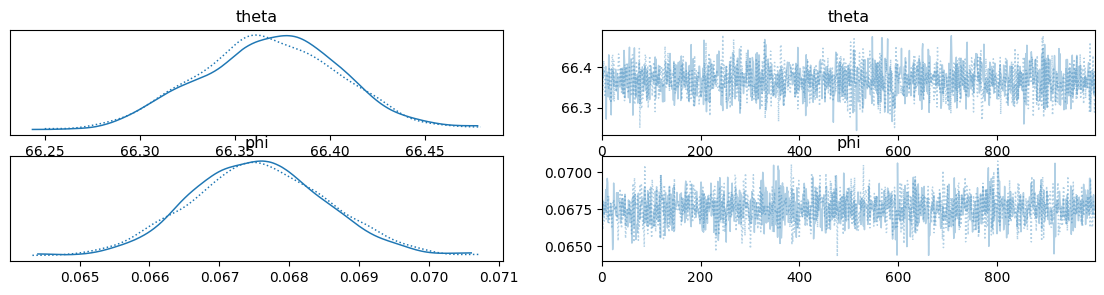

In [10]:
fig, ax = plt.subplots(2,2, figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

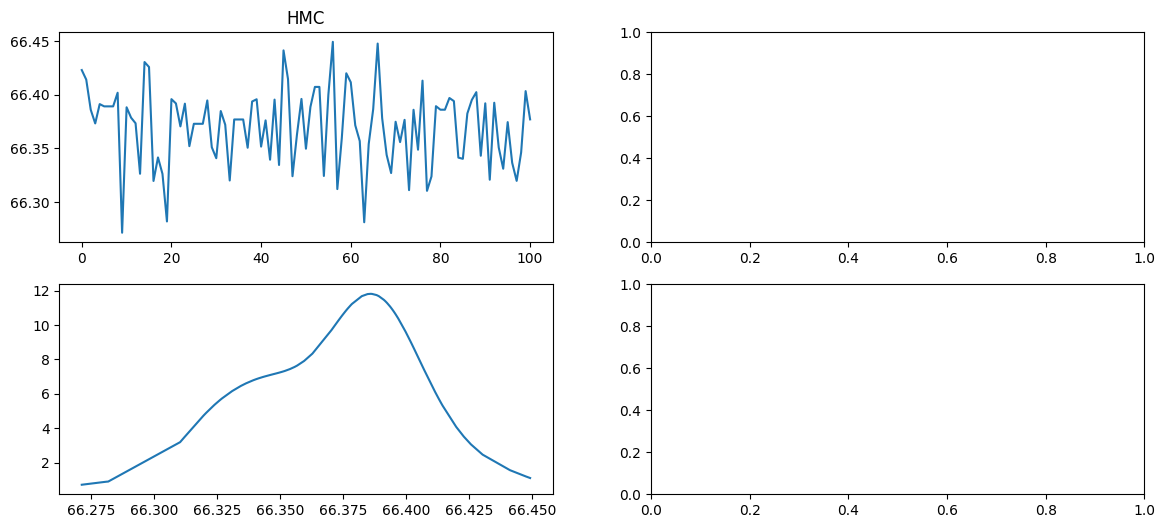

In [22]:
from scipy.stats import gaussian_kde; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2, 2, figsize=(14,6))
n_mcmc_samples = 100
mcmc_chain = idata_HMC.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,0].plot(mcmc_chain); ax[1,0].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0,0].set_title("HMC");


Autocorrelation for HMC (MCMC) chain 0.0015117117670381847               ...is negative autocorrelation good?
Autocorrelation for MH (MCMC) chain 0.0015117117670381847                 ...is large positive autocorrelation good?


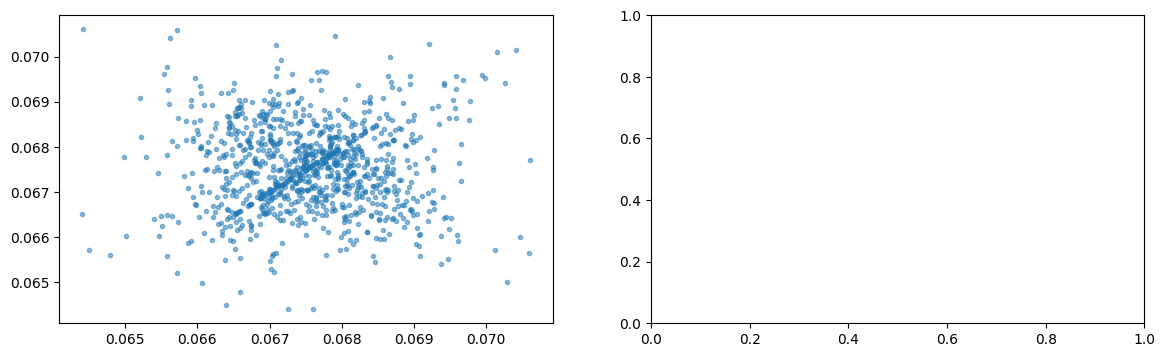

In [28]:
import numpy as np; import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,2
                                                                           , figsize=(14,4))
max_mcmc_samples = 1000
mcmc_chain = idata_HMC.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values; mcmc_chain_one_step_ahead = idata_HMC.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values; ax[0].plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1], "              ...is negative autocorrelation good?")

print("Autocorrelation for MH (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1], "                ...is large positive autocorrelation good?")
